# Exploring AVIRIS-NG Surface Reflectance

*Author:  ORNL DAAC*
<br>
*Date: August 14, 2022*
<br>
*Contact for [ORNL DAAC](https://daac.ornl.gov/):  uso@daac.ornl.gov*

##### Keywords:  ORNL DAAC, AVIRIS-NG, ABoVE, Python

# Tutorial Overview

This tutorial demonstrates methods to read and perform a Principal Components Analysis on 1 file of Surface Reflectance data from the AVIRIS-NG instrument.  The AVIRIS-NG (Airborne Visible/Infrared Imaging Spectrometer-Next Generation) instrument provides continuous radiance measurements of surface reflectance.  This approximates one step in a study of Wetland Vegetation Classification conducted by NASA's Arctic-Boreal Vulnerability Experiment (ABoVE) Science team.  The study incorporated data from NASA airborne instruments, including the AVIRIS-NG instrument.  The ABoVE study included applications associating spectral characteristics with land cover classification focused on water and wetland vegetation communities over the Peace-Athabasca Delta (PAD), Canada.

In this tutorial, we'll use python methods to:
1. Read and explore a flight path of AVIRIS-NG Spectral Reflectance (L2) data
2. Create Spectral Profiles of the AVIRIS-NG data
3. Export georeferenced multiband geoTIFF files
4. Run a Principal Components Analysis (PCA) on an AVIRIS-NG Spectral Reflectance file

   

## Source Data and Datasets:  
### 1.) ABoVE: Wetland Vegetation Classification for Peace-Athabasca Delta (PAD), Canada, 2019

This tutorial is inspired by a small subset of methods described in this dataset.  

**Citation:**  Wang, C., T.M. Pavelsky, E.D. Kyzivat, F. Garcia-Tigreros, F. Yao, X. Yang, S. Zhang, C. Song, T. Langhorst, W. Dolan, M. Kurek, M.E. Harlan, L.C. Smith, D. Butman, R.G.M. Spencer, C.J. Gleason, and D.L. Peters. 2022. ABoVE: Wetland Vegetation Classification for Peace-Athabasca Delta, Canada, 2019. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2069

**User Guide** 
https://daac.ornl.gov/ABOVE/guides/Wetland_VegClassification_PAD.html

![title](images/Wetland_VegClassification_PAD_Fig1.jpg)  <h5><center>Wetland vegetation community classification for the Peace-Athabasca Delta, Alberta, Canada (image source: Wang et al. https://daac.ornl.gov/ABOVE/guides/Wetland_VegClassification_PAD.html) </center></h5>


-- The *Peace–Athabasca Delta*, located in northeast Alberta, is the largest freshwater inland river delta in North America. It is located partially within the southeast corner of Wood Buffalo National Park, Canada's largest national park. The delta region is designated a wetland of international importance and a UNESCO World Heritage Site. Source:  https://en.wikipedia.org/wiki/Peace%E2%80%93Athabasca_Delta



### 2.) AVIRIS-NG Surace Reflectance (L2) Data

For this tutorial, one flight path is used (outlined in blue). https://avirisng.jpl.nasa.gov/dataportal/

AVIRIS-NG Surface Reflectance Flight Line source: https://avng.jpl.nasa.gov/avng/y19_data/ang20190716t180912rfl.tar.gz


![title](images/PAD_withAVIRIS-NG2019FlightLines.PNG)  <h5><center>AVIRIS-NG 2019 Flight Lines within the PAD</center></h5>

### ABoVE Campaign Description

**ABoVE:** The Arctic-Boreal Vulnerability Experiment (ABoVE) is a NASA Terrestrial Ecology Program field campaign being conducted in Alaska and western Canada, for 8 to 10 years, starting in 2015. Research for ABoVE links field-based, process-level studies with geospatial data products derived from airborne and satellite sensors, providing a foundation for improving the analysis, and modeling capabilities needed to understand and predict ecosystem responses to, and societal implications of, climate change in the Arctic and Boreal regions.

#### Insert landing page(s) for data/flight line access/download

# Part 1: Explore AVIRIS-NG Surface Reflectance from the ABoVE PAD Study Area

## 1. Download AVIRIS-NG L2 Surface Reflecatance Data
For this tutorial, one flight path is used:

**AVIRIS-NG Surface Reflectance** source: https://avng.jpl.nasa.gov/avng/y19_data/ang20190716t180912rfl.tar.gz

Untar and Uncompress the tar.gz file.  There will be 2 files in ENVI format (a binary file and a header file (*.hdr):

- **ang20190716t180912_rfl_v2v2_img**
- **ang20190716t180912_rfl_v2v2_img.hdr**


### Explore the AVIRIS-NG ENVI header (text) file

ENVI Header file description:  https://www.l3harrisgeospatial.com/docs/enviheaderfiles.html

The Header file is a text file.  

In [1]:
with open('JPL_files/ang20190716t180912_rfl_v2v2_img.hdr') as f:
    lines = f.read()
    print(lines)

ENVI
description = {
  AVIRIS-NG Measured Radiances in uW nm-1 cm-2 sr-1}
samples = 650
lines = 3828
bands = 425
header offset = 0
file type = ENVI
data type = 4
interleave = bil
byte order = 0
map info = { UTM , 1 , 1 , 470067.498003 , 6546668.5737 , 5.1 , 5.1 , 12 , North , WGS-84 , units=Meters , rotation= 2.0000000 }
crosstrack scatter file = /home/jchapman/src/isat/ang/cal/data/20170125_via_ang20160925t182412_crf
wavelength units = Nanometers
flat field file = /home/jchapman/src/isat/ang/cal/data/20180727_ang20180628_BLUSS_avg_rows300-340_ff
wavelength file = /home/jchapman/src/isat/ang/cal/data/20190111_ang20180325t061759_wavelength_fit_full.txt
wavelength = { 376.719576 , 381.729576 , 386.739576 , 391.749576 , 396.749576 , 401.759576 , 406.76957600000003 , 411.77957599999996 , 416.789576 , 421.799576 , 426.80957600000005 , 431.819576 , 436.819576 , 441.829576 , 446.839576 , 451.84957599999996 , 456.859576 , 461.869576 , 466.87957600000004 , 471.87957600000004 , 476.889576 , 481.

## 2. Load python modules 
- **`NumPy`** is the fundamental package for scientific computing within Python and provides an N-dimensional array object suitable for multidimensional files.
- **`gdal`** a popular Geospatial Data Abstraction Library.  A translator library for raster and vector geospatial data formats.

In [2]:
import gdal
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#set working directories and file location of flight path
#file_dir = ('AVIRIS-NG_L2_files/ang20190715t174825_corr_v2v2_img')

## 3. Open and explore the file as a `GDAL` raster dataset

In [4]:
image_open = gdal.Open('JPL_files/ang20190716t180912_rfl_v2v2_img')
# GetDescription provides the path name of the image
image_open.GetDescription()

'JPL_files/ang20190716t180912_rfl_v2v2_img'

#### GetMetadata

- The GDAL **`GetMetadata`** function can read some metadata from images and organizes the metadata in the form of a dictionary

- Notice that the Metadata is a **dictionary** with `band numbers` as the **key** and `wavelength` as the **value**

In [5]:
image_open.GetMetadata()

{'Band_1': '376.719576 Nanometers',
 'Band_10': '421.799576 Nanometers',
 'Band_100': '872.579576 Nanometers',
 'Band_101': '877.589576 Nanometers',
 'Band_102': '882.5995760000001 Nanometers',
 'Band_103': '887.599576 Nanometers',
 'Band_104': '892.6095760000001 Nanometers',
 'Band_105': '897.6195759999999 Nanometers',
 'Band_106': '902.629576 Nanometers',
 'Band_107': '907.639576 Nanometers',
 'Band_108': '912.6495759999999 Nanometers',
 'Band_109': '917.659576 Nanometers',
 'Band_11': '426.80957600000005 Nanometers',
 'Band_110': '922.669576 Nanometers',
 'Band_111': '927.669576 Nanometers',
 'Band_112': '932.679576 Nanometers',
 'Band_113': '937.689576 Nanometers',
 'Band_114': '942.699576 Nanometers',
 'Band_115': '947.7095760000001 Nanometers',
 'Band_116': '952.719576 Nanometers',
 'Band_117': '957.729576 Nanometers',
 'Band_118': '962.729576 Nanometers',
 'Band_119': '967.739576 Nanometers',
 'Band_12': '431.819576 Nanometers',
 'Band_120': '972.749576 Nanometers',
 'Band_121':

### Use pandas dataframe for a nicer display of band and wavelength 
- create python lists of `band_numbers` and `band_wavelength`

In [6]:
# lists of band numbers and band center
band_numbers = [int(b.split("_")[1]) for b in image_open.GetMetadata().keys() if b != "wavelength_units"]
band_wavelength = [float(b.split(" ")[0]) for b in image_open.GetMetadata().values() if b != "Nanometers"]

# data frame describing bands
bands = pd.DataFrame({ 
    "Band number": band_numbers, 
    "Band wavelength (nm)": band_wavelength}, index = band_wavelength).sort_index()

# print the first ten rows
bands.head(20)
#bands.head(425)


,Band number,Band wavelength (nm)
376.719576,1,376.719576
381.729576,2,381.729576
386.739576,3,386.739576
391.749576,4,391.749576
396.749576,5,396.749576
401.759576,6,401.759576
406.769576,7,406.769576
411.779576,8,411.779576
416.789576,9,416.789576
421.799576,10,421.799576


In [7]:
print(band_wavelength)

[376.719576, 421.799576, 872.579576, 877.589576, 882.5995760000001, 887.599576, 892.6095760000001, 897.6195759999999, 902.629576, 907.639576, 912.6495759999999, 917.659576, 426.80957600000005, 922.669576, 927.669576, 932.679576, 937.689576, 942.699576, 947.7095760000001, 952.719576, 957.729576, 962.729576, 967.739576, 431.819576, 972.749576, 977.7595759999999, 982.769576, 987.779576, 992.7895759999999, 997.799576, 1002.7995759999999, 1007.8095760000001, 1012.8195760000001, 1017.829576, 436.819576, 1022.839576, 1027.8495759999998, 1032.8595759999998, 1037.859576, 1042.869576, 1047.8795759999998, 1052.889576, 1057.899576, 1062.909576, 1067.919576, 441.829576, 1072.929576, 1077.929576, 1082.939576, 1087.949576, 1092.959576, 1097.969576, 1102.9795760000002, 1107.989576, 1112.989576, 1117.9995760000002, 446.839576, 1123.0095760000002, 1128.019576, 1133.029576, 1138.039576, 1143.049576, 1148.059576, 1153.0595759999999, 1158.0695759999999, 1163.0795759999999, 1168.089576, 451.84957599999996, 

In [8]:
band_wavelength.sort()

print(band_wavelength)



[376.719576, 381.729576, 386.739576, 391.749576, 396.749576, 401.759576, 406.76957600000003, 411.77957599999996, 416.789576, 421.799576, 426.80957600000005, 431.819576, 436.819576, 441.829576, 446.839576, 451.84957599999996, 456.859576, 461.869576, 466.87957600000004, 471.87957600000004, 476.889576, 481.899576, 486.909576, 491.919576, 496.929576, 501.93957600000005, 506.94957600000004, 511.94957600000004, 516.959576, 521.9695760000001, 526.979576, 531.9895759999999, 536.999576, 542.009576, 547.009576, 552.0195759999999, 557.029576, 562.039576, 567.049576, 572.059576, 577.069576, 582.0795760000001, 587.0795760000001, 592.089576, 597.099576, 602.1095760000001, 607.1195759999999, 612.1295759999999, 617.139576, 622.139576, 627.149576, 632.1595759999999, 637.169576, 642.179576, 647.189576, 652.199576, 657.209576, 662.209576, 667.2195760000001, 672.229576, 677.2395759999999, 682.249576, 687.259576, 692.269576, 697.2695759999999, 702.279576, 707.289576, 712.299576, 717.309576, 722.319576, 727

### GDAL to get the number of `bands`, `rows`, and `columns` in the file

In [9]:
nbands = image_open.RasterCount
nrows = image_open.RasterYSize
ncols = image_open.RasterXSize

print("\n".join(["Bands:\t"+str(nbands), "Rows:\t"+str(nrows), "Cols:\t"+str(ncols)]))

Bands:	425
Rows:	3828
Cols:	650


### GDAL to get file Projection Informatin 

In [10]:
image_open.GetProjection()

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

## 4. Read one spectral band array and plot it

- Band 57 is 657nm (the center of the Landsat red band)
- Band 38 is 562nm (the center of the Landsat green band)
- Band 22 is 482nm (the center of the Landsat blue band)

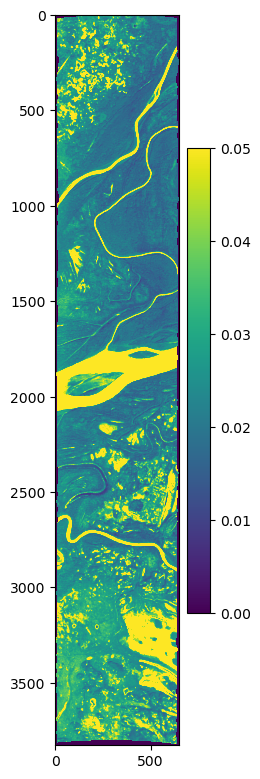

In [11]:
img_red = image_open.GetRasterBand(57).ReadAsArray()  # Band 57 is 657nm (the center of the Landsat red band)
#img_green = image_open.GetRasterBand(38).ReadAsArray()  # Band 38 is 562nm (the center of the Landsat green band)
#img_blue = image_open.GetRasterBand(22).ReadAsArray()  # Band 22 is 482nm (the center of the Landsat blue band)
plt.rcParams['figure.figsize'] = [2,15]
plt.rcParams['figure.dpi'] = 100
plt.imshow(img_red, vmin=0, vmax=0.05)
#plt.imshow(img_green, vmin=0, vmax=0.05)
#plt.imshow(img_blue, vmin=0, vmax=0.05)
plt.colorbar()
plt.show()

## 5. Plot the Reflectance Profile for a single pixel location

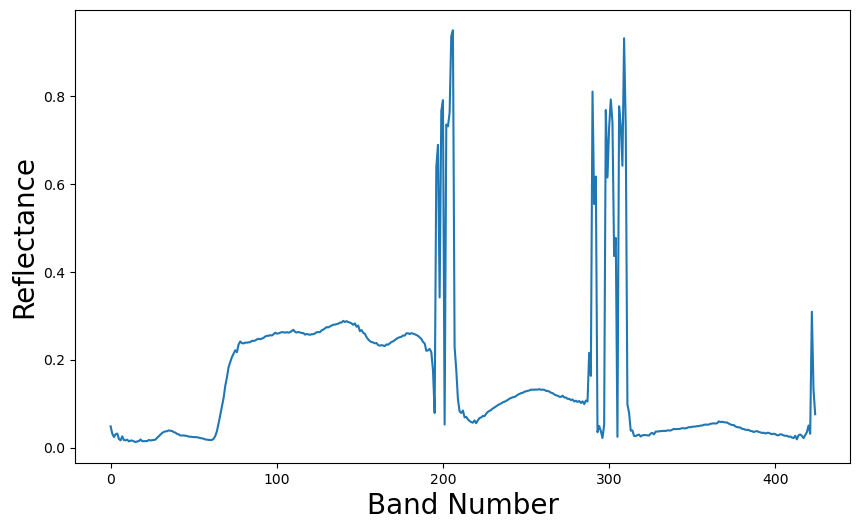

In [12]:
# Load a single pixel and plot its reflectance spectrum
# A vegetation pixel
pixelv = image_open.ReadAsArray(450, 1200, 1, 1) # "eye-ball" the pixel location: col, row
pixelv = np.reshape(pixelv, (425))
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(pixelv)
plt.xlabel('Band Number', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()


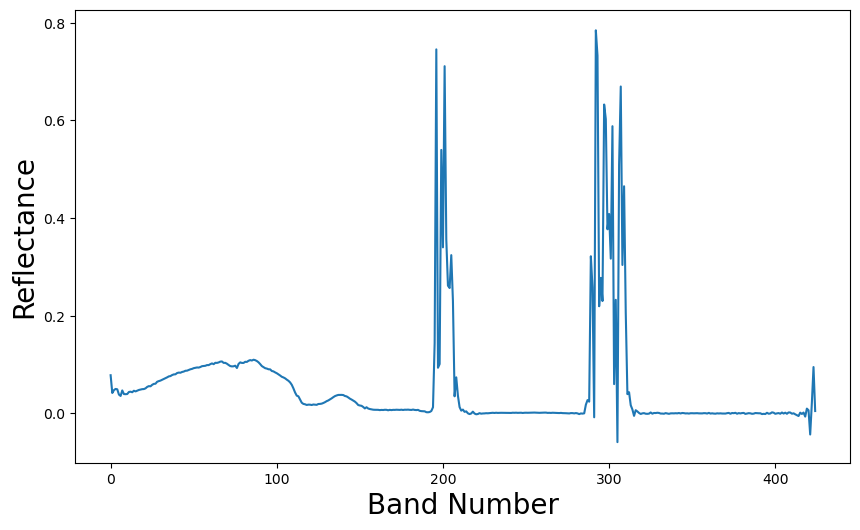

In [13]:
# Load a single pixel and plot its reflectance spectrum
pixelw = image_open.ReadAsArray(50, 2020, 1, 1)
pixelw = np.reshape(pixelw, (425))
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(pixelw)
plt.xlabel('Band Number', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

### Remove the noise of the Atmospheric Windows

- Wavelengths are available from the ENVI header file

In [14]:
# Define a bad bands list 

bblist = np.ones((425,))  # create a 1D array with values ones
# set tails and atmospheric window to zero
bblist[0:14] = 0        # tail
bblist[189:225] = 0     # atmospheric window
bblist[281:336] = 0     # atmospheric window
bblist[405:] = 0        # tail

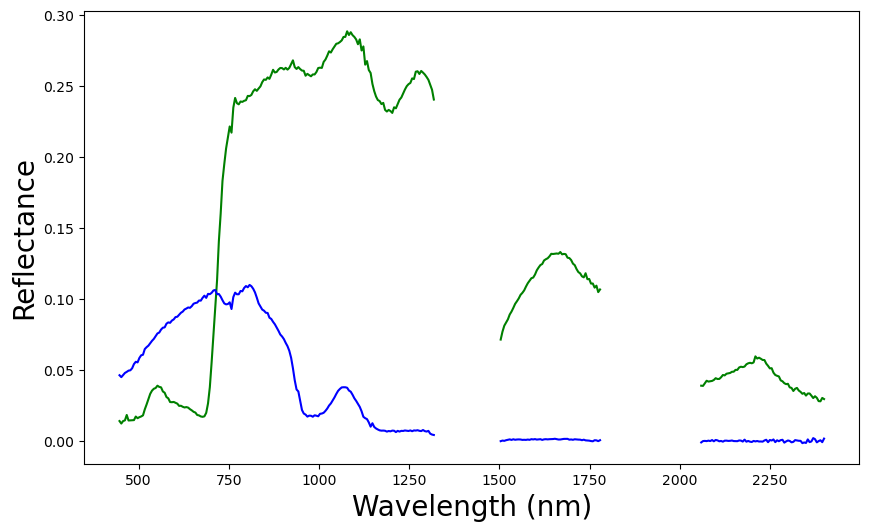

In [15]:
# Re-plot with the bad bands list and wavelengths applied
pixelv[bblist == 0] = np.nan    # vegeatation pixel
pixelw[bblist == 0] = np.nan    # water pixel

# Compare vegetation and water spectra
#plt.plot(wavelengths, pixelv, color = 'g')
plt.plot(band_wavelength, pixelv, color = 'g')
#plt.plot(wavelengths, pixelw, color = 'b')
plt.plot(band_wavelength, pixelw, color = 'b')
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.show()

### Characteristic reflectance patterns of water, soil, and vegetation in different wavelengths
#### grey bands are Landsat TM channels

<img src="images/spectral_signatures_landsat.jpg" width="825" height="450">
<h5><center>Reflectance of water, soil, and vegetation in different wavelengths and Landsat TM channels 1 (0.45-0.52 μm), 2 (0.52-0.60 μm), 3 (0.63-0.69 μm), 4 (0.76-0.90 μm), 5 (1.55-1.75 μm) and 7 (2.08-2.35 μm) Source: https://seos-project.eu/classification/classification-c01-p05.html </center></h5>

## 6. Export R,G,B,NIR to a 4-band projected geoTIFF

#### GDAL's raster library uses the `GDALDataset` class to obtain properties of a raster image
- GetRasterBand
- GetProjection
- GetGeoTransform

In [18]:
# Extract RGB and NIR bands and save as a 4-band GeoTiff to visualize in a GIS
#  Recall from above:  image_open = gdal.Open('JPL_files/ang20190716t180912_rfl_v2v2_img')

blue = image_open.GetRasterBand(22).ReadAsArray()    # Band 22 is 482nm (the center of the Landsat blue band)
green = image_open.GetRasterBand(38).ReadAsArray()   # Band 38 is 562nm (the center of the Landsat green band)
red = image_open.GetRasterBand(57).ReadAsArray()     # Band 57 is 657nm (the center of the Landsat red band)
nir = image_open.GetRasterBand(100).ReadAsArray()    # Band 100 is 877nm - NIR

print("blue band wavelength: ", band_wavelength[22])
print("green band wavelength: ", band_wavelength[38])
print("red band wavelength: ", band_wavelength[57])
print("nir band wavelength: ", band_wavelength[100])

outfile = ('ang20190716t180912_rfl_v2v2_img_RGBNIR.tif')
rows = image_open.RasterYSize                      # store the no. of rows
cols = image_open.RasterXSize                      # store the no. of cols
datatype = image_open.GetRasterBand(1).DataType
projection = image_open.GetProjection()            # gdal's image projection information
transform = image_open.GetGeoTransform()           # gdal's tranform information from pixel to coordinate space
print()
print(" Projection Information: ", projection)

driver = gdal.GetDriverByName("GTiff")                        # gdal: create a geoTIFF dataset from format driver
DataSetOut = driver.Create(outfile, cols, rows, 4, datatype)  # using the GDAL create method
DataSetOut.GetRasterBand(1).WriteArray(blue)
DataSetOut.GetRasterBand(2).WriteArray(green)
DataSetOut.GetRasterBand(3).WriteArray(red)
DataSetOut.GetRasterBand(4).WriteArray(nir)
DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

blue band wavelength:  486.909576
green band wavelength:  567.049576
red band wavelength:  662.209576
nir band wavelength:  877.589576

 Projection Information:  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


----

GeoTIFF files displayed in QGIS
<table><tr>
<td> <img src="images/aviris-ngRGB.PNG"> </td>
<td> <img src="images/aviris-ng_FalseColor423.PNG"> </td>
</tr></table>
<h5><center>Left: True color image (R(3),G(2),B(1))  -  Right: False Color Composite (NIR(4),G(2),R(3))  : scaled 0 - 0.1)</center></h5>

----

# Part 2: Principal Components Analysis

PCA:  An unsupervised learning approach to reduce from high dimensionality to low dimensionality

## 1. Import Python's Ski-Learn Package and the PCA module

- Simple and efficient tools for predictive data analysis
- Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA

In [20]:
from sklearn.decomposition import PCA

### Create a mask
- This will be used later to mask out zero values from the PCA

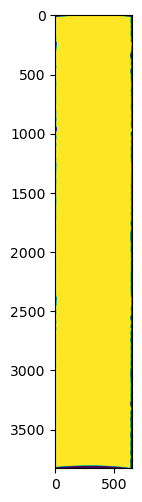

In [22]:
# Open and read the Red band for creating a Mask
image_open = gdal.Open('JPL_files/ang20190716t180912_rfl_v2v2_img')

red = image_open.GetRasterBand(57).ReadAsArray()

mask = np.ones(np.shape(red))   # create an array with all 1's
mask[red == -9999] = 0          # set nodata values to 0

plt.rcParams['figure.figsize'] = [4,6]
plt.imshow(mask)
plt.show()

In [24]:
# Create a new array based on the number of good bands and pixels in the image

pixels = np.count_nonzero(mask)       # get the number of nonzero pixels
bands = np.count_nonzero(bblist)      # get the number of good bands (recall the bad bands list)
img_vals = np.zeros((bands, pixels)).astype(int)  # create a numpy array with size bands, pixels

print('pixels = ', pixels)
print('bands = ', bands)
print('shape = ', img_vals.shape)
img_vals

pixels =  2415411
bands =  300
shape =  (300, 2415411)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# # Prepare the data for the PCA analysis

# Load all of the good band data into a new array
# Load each band in individually (This may take a minute)

import time
start = time.time()

j = 0
for i in range(0, len(bblist)):
    if bblist[i] == 1:
        
        # Reduce the memory needed by loading only masked values in as integers
        img_vals[j] = ((image_open.GetRasterBand(i+1).ReadAsArray()[mask == 1])*100000).astype(int)
        j += 1

end = time.time()
print ("Time elapsed (seconds):", end - start)    # elapsed time is approx 2 - 3 minutes

Time elapsed (seconds): 74.4889178276062


In [26]:
# examine the array

print('dims = ', img_vals.ndim)    # the PCA will take a 2D array
print('shape = ', img_vals.shape)
img_vals

dims =  2
shape =  (300, 2415411)


array([[-5229, -1030, -1038, ...,  2610,  2627,  2493],
       [-5000, -1061, -1056, ...,  2548,  2487,  2291],
       [-4880, -1113, -1107, ...,  2532,  2360,  2284],
       ...,
       [ -271,  -106,  -158, ...,  4765,  5337,  4373],
       [ -151,  -128,  -244, ...,  4894,  5033,  4224],
       [ -209,  -281,  -272, ...,  4625,  4788,  3787]])

In [27]:
# Reorder the axes to feed into the PCA function (samples, components)

img_vals = np.rollaxis(img_vals, 1)  #the PCA function expects the samples to be in rows
print('dims = ', img_vals.ndim)
print('shape = ', img_vals.shape)
img_vals

dims =  2
shape =  (2415411, 300)


array([[-5229, -5000, -4880, ...,  -271,  -151,  -209],
       [-1030, -1061, -1113, ...,  -106,  -128,  -281],
       [-1038, -1056, -1107, ...,  -158,  -244,  -272],
       ...,
       [ 2610,  2548,  2532, ...,  4765,  4894,  4625],
       [ 2627,  2487,  2360, ...,  5337,  5033,  4788],
       [ 2493,  2291,  2284, ...,  4373,  4224,  3787]])

In [28]:
# Run the PCA
# This also may take a minute
start = time.time()

n_components = 10
pca = PCA(n_components=n_components)  # create the PCA object, necessary in sklearn
pca.fit(img_vals)                     # call the fit method on the data
img_pca = pca.transform(img_vals)     # generate coordinates for a PCA based on the scores of the scaled data

end = time.time()
print ("Time elapsed (seconds):", end - start)  # elapsed time is approx 1 - 2 minutes

Time elapsed (seconds): 65.28780579566956


https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

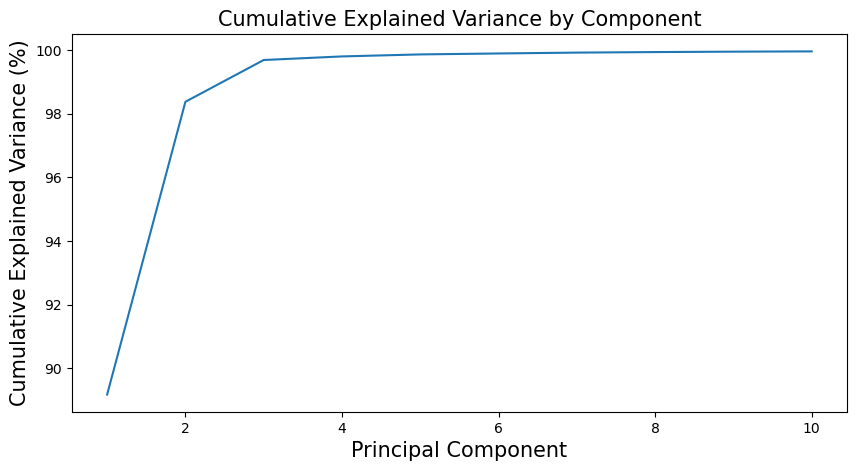

[89.17675746 98.37112398 99.68247768 99.79496474 99.85820939 99.88768807
 99.91499517 99.93182361 99.94451313 99.95333611]


In [30]:
# Plot the cumulative explained variance by component
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100  # calculate the percentage of variation that each 
                                                         # principal component accountS for
                                                         # and determine a cumulative sum
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance by Component', fontsize=15)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.plot(range(1, 11), var_cumu)
plt.show()

print(var_cumu)

In [31]:
# Map the PCA output back into the 3D array
pca_bands = np.zeros((n_components, rows, cols))
np.shape(img_pca)
pca_bands[:, mask == 1] = np.rollaxis(img_pca, 1)


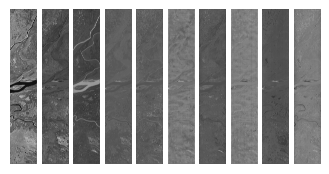

In [32]:
# subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,10)
# use the created array to output your multiple images
axarr[0].imshow(pca_bands[0], cmap='gray')
axarr[0].axis('off')
axarr[1].imshow(pca_bands[1], cmap='gray')
axarr[1].axis('off')
axarr[2].imshow(pca_bands[2], cmap='gray')
axarr[2].axis('off')
axarr[3].imshow(pca_bands[3], cmap='gray')
axarr[3].axis('off')
axarr[4].imshow(pca_bands[4], cmap='gray')
axarr[4].axis('off')
axarr[5].imshow(pca_bands[5], cmap='gray')
axarr[5].axis('off')
axarr[6].imshow(pca_bands[6], cmap='gray')
axarr[6].axis('off')
axarr[7].imshow(pca_bands[7], cmap='gray')
axarr[7].axis('off')
axarr[8].imshow(pca_bands[8], cmap='gray')
axarr[8].axis('off')
axarr[9].imshow(pca_bands[9], cmap='gray')
axarr[9].axis('off')
plt.show()

In [38]:
# Select the PCA bands that together explain >99.9% of the image's variance
pca_results = pca_bands[0:4]

# Save the 6-band PCA output
outfile = ('ang20190716t180912_rfl_v2v2_img_PCA.tif')
rows = image_open.RasterYSize
cols = image_open.RasterXSize
datatype = image_open.GetRasterBand(1).DataType
projection = image_open.GetProjection()
transform = image_open.GetGeoTransform()
driver = gdal.GetDriverByName("GTiff")
DataSetOut = driver.Create(outfile, cols, rows, 3, datatype)
DataSetOut.GetRasterBand(1).WriteArray(pca_results[0])
DataSetOut.GetRasterBand(2).WriteArray(pca_results[1])
DataSetOut.GetRasterBand(3).WriteArray(pca_results[2])

DataSetOut.SetProjection(projection)
DataSetOut.SetGeoTransform(transform)
DataSetOut = None

PCA Components 1, 2, and 3 displayed in QGIS
<table><tr>
<td> <img src="images/PCA1.PNG"> </td>
<td> <img src="images/PCA2.PNG"> </td>
<td> <img src="images/PCA3.PNG"> </td>
</tr></table>
<h5><center> </center></h5>

### A PCA analysis was a first step in the methods in order to reduce the dimensionaly of the AVIRIS-NG data.  

----
----

## Wetland Vegetation Classification  for the Peace-Athabasca Delta, Alberta, Canada derived from the AVIRIS-NG data
### From Wang et al. 2022  https://doi.org/10.3334/ORNLDAAC/2069

![title](images/PADwWetlandAVIRISclass.PNG)  <h5><center>Wetland vegetation community classification for the Peace-Athabasca Delta, Alberta, Canada derived from the AVIRIS-NG data (ORNL DAAC source file: PAD_2019_Model1_cls_v1.tif).  AVIRIS-NG 2019 Flight paths overlaid. </center></h5>